<a target="_blank" href="https://colab.research.google.com/github/da-python/new-modul-python/blob/main/Lesson2/hometask/HH-api-hometask.ipynb">


<a target="_blank" href="https://colab.research.google.com/github/da-python/new-modul-python/blob/main/Lesson2/hometask/HH-api-hometask.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

** В случае ответов от api.hh.ru с ошибками типа "Captcha" постарайтесь их обработать, например, с помощью time.sleep или изменения ip-адреса

In [178]:
import requests
from tqdm.auto import tqdm
import pandas as pd
import numpy as np
import os
from datetime import datetime
from operator import itemgetter
import time

In [179]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}'

In [180]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [181]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [182]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [183]:
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/20 [00:00<?, ?it/s]

In [184]:
len(all_vacancy_ids)

2000

In [185]:
vac_full_info = []
for pg in range(20): 
    x=50*pg
    pg+=1
    y=50*pg
    for i in range(x, y):
        vac_id = all_vacancy_ids[i]
        url = f'https://api.hh.ru/vacancies/{vac_id}'
        res = requests.get(url)
        vacancy = res.json()
        vac_full_info.append(vacancy)
    print(pg)
    time.sleep(20)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [186]:
vac_full_info[1]

{'id': '78670316',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Руководитель направления по развитию детских образовательных проектов',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Кутузовский проспект',
  'building': '32',
  'lat': 55.740421,
  'lng': 37.532071,
  'description': None,
  'raw': 'Москва, Кутузовский проспект, 32',
  'metro': {'station_name': 'Кутузовская',
   'line_name': 'МЦК',
   'station_id': '95.536',
   'line_id': '95',
   'lat': 55.740833,
   'lng': 37.533333},
  'metro_stations': [{'station_name': 'Кутузовская',
    'line_name': 'МЦК',
    'station_id': '95.536',
    'line_id': '95',
    'lat': 55.740833,
    'lng': 37.533333}]},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до

In [187]:
vac_info = pd.DataFrame(vac_full_info, columns = ['name','id','description','published_at','key_skills'])

In [188]:
def convert_datetime(x):
   
    if type(x)==str:
        new_x = datetime.strptime(x[:10], '%Y-%m-%d')
        return new_x
    else :
        new_x = None  
        return new_x
vac_info['published_at'] = pd.to_datetime(vac_info['published_at'].apply(convert_datetime))

In [189]:
vac_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          1000 non-null   object        
 1   id            1000 non-null   object        
 2   description   1000 non-null   object        
 3   published_at  1000 non-null   datetime64[ns]
 4   key_skills    1000 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 39.2+ KB


In [190]:
vac_info_date_count = vac_info.groupby(['published_at']).count()
vac_info_date_count_plot = pd.DataFrame(vac_info_date_count, columns = ['id'])

<AxesSubplot:xlabel='published_at'>

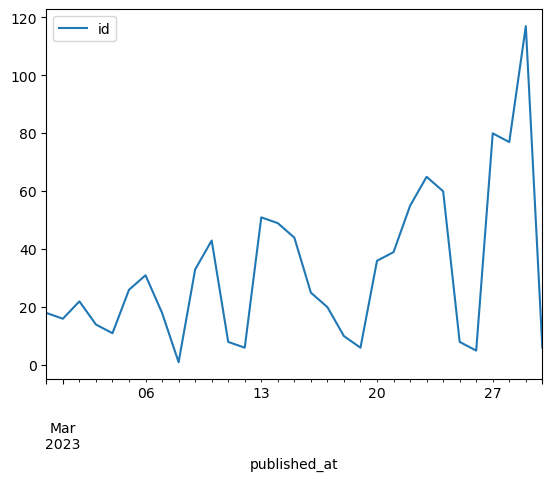

In [191]:
vac_info_date_count_plot.plot()

In [192]:
vac_info_day=pd.DataFrame(vac_full_info,columns = ['name','id','description','published_at','key_skills'])

In [193]:
#vac_info_day.at[0,'published_at']

In [194]:
def convert_day(x):
    if type(x)==str:
        new_x = datetime.weekday(datetime.strptime(x[:10], '%Y-%m-%d'))
        return new_x
    else :
        new_x = 6 
        return new_x
vac_info_day['published_at'] = vac_info_day['published_at'].apply(convert_day).astype(int)

In [195]:
vac_info_date_count = vac_info_day.groupby(['published_at']).count()
vac_info_date_count

,name,id,description,key_skills
published_at,,,,
0,198,198,198,198
1,201,201,201,201
2,233,233,233,233
3,151,151,151,151
4,137,137,137,137
5,37,37,37,37
6,43,43,43,43


In [196]:
vac_desc = pd.DataFrame(vac_full_info, columns = ['name','id','description','published_at','key_skills'])

In [197]:
vac_sql = []
for i in range(len(vac_desc)):
    if type(vac_desc['name'][i]) == str:
        if ('SQL' in vac_desc['name'][i]) == True:
            vac_sql.append(vac_desc['name'][i])
print('Вакансий которые мне нравяться(со словом SQL): '  + str(len(vac_sql)))

Вакансий которые мне нравяться(со словом SQL): 4


In [198]:
vac_skill = pd.DataFrame(vac_full_info, columns = ['name','id','description','published_at','key_skills'])

In [199]:
vac_skill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          1000 non-null   object
 1   id            1000 non-null   object
 2   description   1000 non-null   object
 3   published_at  1000 non-null   object
 4   key_skills    1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [200]:
skill = []
for i in range(len(vac_skill)): 
    if len(vac_skill['key_skills'][i]) != 0: 
        x=vac_skill['key_skills'][i]
        for j in range(len(x)): 
            skill.append(x[j]['name'])

In [201]:
def analysis(your_list, your_dict):
    for i in your_list:
        if i in your_dict:
            your_dict[i] += 1
        else:
            your_dict[i] = 1

In [202]:
dct_skill = {}
analysis(skill, dct_skill)

In [203]:
dct_skill_sort = dict(sorted(dct_skill.items(), key=itemgetter(1), reverse=True))

In [204]:
index_for_max = []
for i in range(len(dct_skill_sort.values())):
    if list(dct_skill_sort.values())[i] == max(list(dct_skill_sort.values())):
        index_for_max.append(i)

In [205]:
print('Самые востребованные навыки: ')
for i in index_for_max:
    print(list(dct_skill_sort.keys())[i])

Самые востребованные навыки: 
SQL


In [206]:
import plotly as py
import plotly.graph_objs as go
pyplt=py.offline.plot
labels=list(dct_skill.keys())[0:20]
values=list(dct_skill.values())[0:20]
trace=[go.Pie(labels=labels,values=values)]
layout=go.Layout(
    title='Диаграмма наиболее востребованных навыков в процентах'
)
fig=go.Figure(data=trace,layout=layout)
fig.show()